In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
class LogisticRegression:
    def __init__(self, lrate=0.0001, n_iter=50):
        self.lrate = lrate
        self.n_iter = n_iter
    
    def fit(self, X, Y):
        self.theta = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            error = self.hypothesis(X) - Y
            t = self.lrate/X.shape[0]
            self.theta[1:] -= t * np.dot(error,X)
            self.theta[0] -= t * error.sum()
    
    def hypothesis(self, X):
        return np.where(self.predict(X) >= 0.5, 1, -1)
                
    def predict(self, X):
        return 1/(1 + 2.71 ** (-1 * (np.dot(X,self.theta[1:]) + self.theta[0])))
        
         

In [5]:
irisData = pd.read_csv('Iris.csv')


In [9]:
Y = irisData.iloc[0:25,4].values 
Y = np.append(Y,irisData.iloc[50:75,4].values)
Y = np.where(Y == 'Iris-setosa',1,-1)
t = np.unique(Y)
len(t)

2

In [50]:
X = np.append(irisData.iloc[0:25, [0, 2]].values,irisData.iloc[50:75, [0, 2]].values,axis=0)
X.shape

(50, 2)

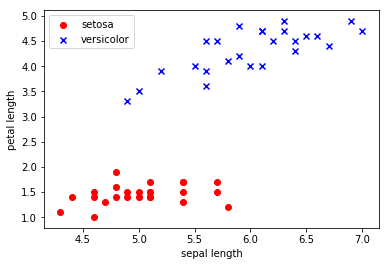

In [52]:
plt.scatter(X[:25,0], X[:25,1], color = 'red', marker='o', label='setosa')
plt.scatter(X[25:50,0], X[25:50,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [53]:
lRegress = LogisticRegression(lrate=0.000001, n_iter=50)
lRegress.fit(X,Y)

In [54]:
lRegress.theta

array([  1.24000000e-06,   3.50400000e-06,  -5.97200000e-06])

In [56]:
lRegress.hypothesis(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [63]:
lRegress.hypothesis(irisData.iloc[30, [0, 2]])

array(1)